# Elbow method: Selecting the number of clusters

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import cluster

### 1. Use 'Annual spending.csv'. Standardize the variables.

In [2]:
df = pd.read_csv('Annual spending.csv')
df.head()

,income,age,days_since_buy,annual_spend
0,37453,48,504,4441
1,50775,50,566,4239
2,71047,41,326,5834
3,52239,52,259,5456
4,112343,27,279,1749


In [3]:
col = df.columns  # all columns
for c in col:
    df['z_'+c] = (df[c] - df[c].mean())/df[c].std()
    df['z_'+c]=preprocessing.scale(df[c])  # alternative
        
df.head()

# One by one
# df['z_income'] = (df['income'] - df['income'].mean())/df['income'].std()
# df['z_income'] = preprocessing.scale(df.income)

,income,age,days_since_buy,annual_spend,z_income,z_age,z_days_since_buy,z_annual_spend
0,37453,48,504,4441,-0.890426,0.604861,0.753257,0.062276
1,50775,50,566,4239,-0.553094,0.789354,1.306361,-0.058939
2,71047,41,326,5834,-0.039778,-0.040865,-0.834688,0.898182
3,52239,52,259,5456,-0.516023,0.973847,-1.432398,0.671353
4,112343,27,279,1749,1.005897,-1.332317,-1.253977,-1.553129


- `col = df.columns`: This retrieves all column names from the DataFrame df and stores them in the variable col.
- `for c in col`: Iterates over each column in the DataFrame.
    - `df['z_'+c] = (df[c] - df[c].mean())/df[c].std()`: For each column, it creates a new column in the DataFrame (with the name 'z_' prefixed to the original column name) that contains the standardized values.
- `preprocessing.scale(df.income)`: Standardizes the 'income' column.

### 2. Use the Elbow method to select the number of clusters

Text(0, 0.5, 'Sum of Squared Errors')

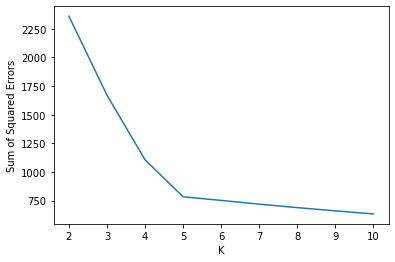

In [4]:
ss = []
krange = range(2,11)  # 2~10
x = df[['z_income', 'z_age', 'z_days_since_buy', 'z_annual_spend']]
x = df.iloc[:, 4:]  # alternative: all rows and columns 5~end

for i in krange:
    m = cluster.KMeans(n_clusters=i).fit(x)
    error = m.inertia_
    ss.append(error)

plt.plot(krange, ss)
plt.xlabel('K')
plt.ylabel('Sum of Squared Errors')

- `ss = []` initializes an empty list to store the sum of squared errors for different numbers of clusters.
- `krange = range(2,11)` defines a range of values from 2 to 10, representing the number of clusters to test.
- `range()` function generates a sequence of numbers. It can take one, two, or three arguments, `range(start(inclusive), stop(exclusive), step)`
    - `range(stop)` generates numbers from 0 up to (but not including) the `stop` value, with a step size 1.
        - `range(5)` = 0, 1, 2, 3, 4
    - `range(start, stop)` generates numbers from `start` up to (but not including) the `stop` value, with a step size of 1.
        - `range(2, 8)` = 2, 3, 4, 5, 6, 7.
    - `range(start, stop, step)` generates numbers from `start` up to (but not including) the `stop` value, with a step size of `step`.
        - `range(1, 10, 2)` = 1, 3, 5, 7, 9.
- `x = df[[...]]` selects specific columns to use in clustering.
- The for loop iterates through the range of cluster numbers, performs k-means clustering for each, and computes the sum of squared errors (inertia) for each model.
    - `KMeans(n_clusters=i)`: initializes a k-means clustering model with a specific number of clusters (n_clusters). The parameter i represents the number of clusters, and it is set in the loop over the range of possible cluster values.
    - `fit(x)`: fits the k-means model to the data x.
    - `m`: The result of the fit(x) operation is assigned to the variable m. This variable now holds the trained k-means clustering model.
    - `m.inertia_` retrieves the inertia of the model m, indicating how internally coherent the clusters are. inertia_ is the sum of squared distances of samples to their closest cluster center, which measures how well k-means clusters data.
    - `ss.append(error)` adds the inertia value to the list ss.
- `plt.plot(krange, ss)` plots the sum of squared errors for each number of clusters, helping to visually identify the "elbow point," which suggests the optimal number of clusters.
- `plt.xlabel('K')` and `plt.ylabel('Sum of Squared Errors')` label the x-axis and y-axis, respectively.

### 3. Conduct k-means clustering using the best number of clusters you found

In [5]:
best = cluster.KMeans(n_clusters=5).fit(x)
df['cluster'] = best.labels_  # cluster numbers
df.head()

,income,age,days_since_buy,annual_spend,z_income,z_age,z_days_since_buy,z_annual_spend,cluster
0,37453,48,504,4441,-0.890426,0.604861,0.753257,0.062276,0
1,50775,50,566,4239,-0.553094,0.789354,1.306361,-0.058939,0
2,71047,41,326,5834,-0.039778,-0.040865,-0.834688,0.898182,2
3,52239,52,259,5456,-0.516023,0.973847,-1.432398,0.671353,2
4,112343,27,279,1749,1.005897,-1.332317,-1.253977,-1.553129,1


- `best = cluster.KMeans(n_clusters=5).fit(x)`: This line creates a k-means clustering model with 5 clusters (as determined to be optimal from previous analysis) and fits it to the standardized columns in the DataFrame.
- `df['cluster'] = best.labels_`: After fitting the model, each data point is assigned a cluster number (from 0 to 4, since there are five clusters). These cluster labels are stored in a new column called 'cluster'.

### 4. What are the number of samples in each cluster?

In [6]:
df.groupby('cluster').count()

,income,age,days_since_buy,annual_spend,z_income,z_age,z_days_since_buy,z_annual_spend
cluster,,,,,,,,
0,197,197,197,197,197,197,197,197
1,199,199,199,199,199,199,199,199
2,199,199,199,199,199,199,199,199
3,201,201,201,201,201,201,201,201
4,204,204,204,204,204,204,204,204


- `df.groupby('cluster')`: groups the DataFrame based on unique values in the 'cluster' column. Each unique value represents a different cluster.
- `count()`: counts the number of rows for each group (i.e., each cluster). The count is done for each column, but since all columns are present for each row, the count will be the same across all columns.

### 5. Calculate the mean of each variable in each cluster

In [7]:
df.groupby('cluster').mean()

,income,age,days_since_buy,annual_spend,z_income,z_age,z_days_since_buy,z_annual_spend
cluster,,,,,,,,
0,43101.812183,50.050761,505.218274,5568.370558,-0.747390,0.794036,0.764125,0.738784
1,116310.542714,29.291457,294.125628,2501.728643,1.106361,-1.120938,-1.119041,-1.101434
2,44331.050251,48.939698,297.472362,5574.000000,-0.716264,0.691545,-1.089184,0.742162
3,42643.611940,30.039801,500.567164,2501.761194,-0.758993,-1.051906,0.722632,-1.101415
4,115626.490196,48.906863,498.500000,5540.818627,1.089040,0.688516,0.704191,0.722251


- `mean()`: This function calculates the mean (average) of each column within each cluster group.

In [8]:
best.cluster_centers_  # alternative: mean of standardized value

array([[-0.74739031,  0.79403626,  0.76412506,  0.73878382],
       [ 1.10636106, -1.12093784, -1.11904052, -1.10143418],
       [-0.71626422,  0.69154454, -1.08918418,  0.74216191],
       [-0.75899261, -1.05190572,  0.72263233, -1.10141465],
       [ 1.08903986,  0.68851556,  0.70419108,  0.72225056]])